In [7]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [46]:
x = data.drop('Survived', axis = 'columns')
y = data.Survived

In [47]:
# one hot encoding Sex 
dummy = pd.get_dummies(x.Sex)
x = pd.concat([x,dummy], axis = 'columns')
x.drop(['Sex','male'], axis = 'columns', inplace = True)
x

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,NaN,23.4500,1
889,1,26.0,30.0000,0


In [48]:
# checking for missing values
x.isna().sum()

# There are 177 missing values in Age columns

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

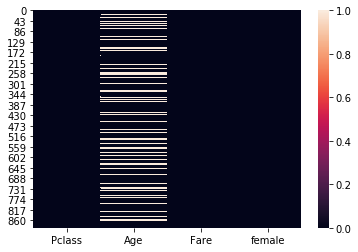

In [49]:
import seaborn as sns
sns.heatmap(x.isna()) # heatmap showing missing values

In [50]:
# replaing NaN values with mean
x.Age = x.Age.fillna(x.Age.mean())
x.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

In [74]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [75]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
nb.score(x_test, y_test)

0.7877094972067039

In [64]:
y_test[:10]

383    1
105    0
336    0
650    0
389    1
865    1
720    1
606    0
146    1
643    1
Name: Survived, dtype: int64

In [65]:
nb.predict(x_test[:10])

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [78]:
nb.predict_proba(x_test[:10])

array([[9.64863507e-01, 3.51364925e-02],
       [9.64763114e-01, 3.52368859e-02],
       [2.23466042e-01, 7.76533958e-01],
       [6.08533332e-01, 3.91466668e-01],
       [1.46970775e-05, 9.99985303e-01],
       [2.32769145e-01, 7.67230855e-01],
       [9.15510139e-01, 8.44898610e-02],
       [6.79661677e-05, 9.99932034e-01],
       [8.99390574e-01, 1.00609426e-01],
       [8.78149745e-01, 1.21850255e-01]])